In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\it_VEDANT\My Learnbay Folder\My Learnbay Folder\Stat and ML by Utkarsha sir\ML_BY_ME\Datasets\insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


## EDA Do by your own

<Axes: xlabel='charges'>

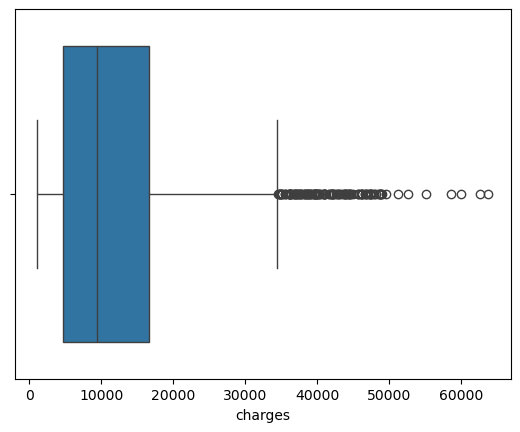

In [7]:
sns.boxplot(data=df,x='charges')

In [ ]:
## We will 1stly create base model
## if it is not giving good result we will go for scaling

In [9]:
## dividing into dep and ind
## insuranceclaim : dependent Variable
X=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [10]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [12]:
### Train_test_split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [34]:
# Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
confusion_matrix(y_test,y_pred)

array([[ 65,  40],
       [ 18, 145]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred)

0.7835820895522388

In [39]:
from sklearn.metrics import precision_score,recall_score
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('precision :',prec)
print('recall :',recall)


precision : 0.7837837837837838
recall : 0.8895705521472392


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       105
           1       0.78      0.89      0.83       163

    accuracy                           0.78       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268



In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
log_roc_auc_score=roc_auc_score(y_test,y_pred)
print('Area under the curve is ',log_roc_auc_score)

Area under the curve is  0.7543090855974292


In [48]:
log.predict_proba(x_test)

array([[3.72971928e-01, 6.27028072e-01],
       [2.08253542e-01, 7.91746458e-01],
       [1.60013680e-01, 8.39986320e-01],
       [5.64185372e-03, 9.94358146e-01],
       [9.30897596e-01, 6.91024035e-02],
       [2.86671766e-01, 7.13328234e-01],
       [1.24879819e-01, 8.75120181e-01],
       [8.03417814e-01, 1.96582186e-01],
       [4.18313212e-01, 5.81686788e-01],
       [9.12943575e-01, 8.70564255e-02],
       [4.95408851e-01, 5.04591149e-01],
       [2.42588934e-01, 7.57411066e-01],
       [5.50097131e-01, 4.49902869e-01],
       [3.12415521e-02, 9.68758448e-01],
       [1.23189742e-01, 8.76810258e-01],
       [4.75980190e-02, 9.52401981e-01],
       [9.05692939e-01, 9.43070607e-02],
       [9.40470219e-01, 5.95297812e-02],
       [1.62661039e-01, 8.37338961e-01],
       [6.60546571e-02, 9.33945343e-01],
       [5.18885850e-02, 9.48111415e-01],
       [1.71600867e-01, 8.28399133e-01],
       [4.30493973e-01, 5.69506027e-01],
       [3.85881181e-01, 6.14118819e-01],
       [2.855180

In [51]:
# .predict_proba returns the probability values for class 0 and class 1
prob=log.predict_proba(x_test)[:,-1]
np.where(prob>=0.5,1,0)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1])

In [55]:
threshold=[0.5,0.4,0.3,0.2,0.1]
tprs=[]
fprs=[]
for i in threshold:
    y_pred=np.where(prob>=i,1,0)
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
    fpr=fp/(tn+fp)
    tpr=tp/(fn+tp)
    tprs.append(tpr)
    fprs.append(fpr)

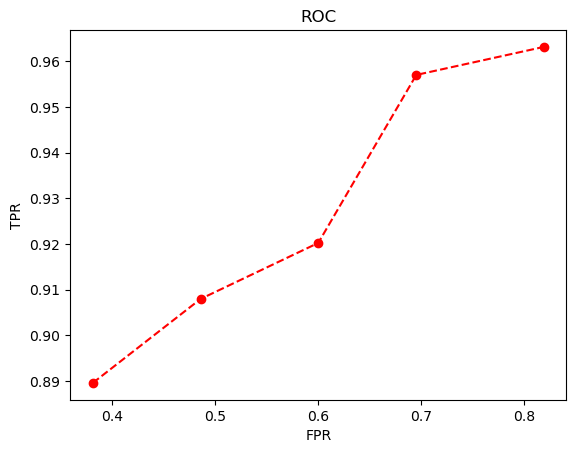

In [58]:
plt.figure()
plt.plot(fprs,tprs,'o--r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [ ]:
## Here as FPR increases TPR is also increasing
# here suppose we want a model which gives good recall
##  so we have to change the threshold value 
# but we can observe thr=0.2 is giving best values for TPR and FPR
# so we can take thre=0.2 for our model


In [64]:
y_pred=np.where(prob>0.2,1,0)  # our threshold
recall_score(y_test,y_pred)

0.9570552147239264

In [ ]:
#### USe Cross Validatioon to validate accuracy